# Consumo de Energia Eléctrica en México
### El presente arcchivo analiza el consumo de energia en el año 2017 dividido por regiones de la Comision Federal de Electricidad



In [1]:
#improtamos librerias
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#abrimos el archivo de datos con entrenamiento
energia1 = pd.read_csv("2017_SEN.csv", skiprows=3)

energia1.head(12)

,Unnamed: 0,CEL,ORI,OCC,NOR,NTE,NES,PEN,Total SIN,BCA,BCS,Total SEN
0,ene,5 042 930,3 815 127,5 348 703,1 402 606,1 810 107,3 717 404,890 019,22 026 896,947 639,180 302,23 154 837
1,feb,4 651 298,3 618 922,5 008 957,1 305 830,1 668 103,3 549 970,859 813,20 662 892,859 065,165 571,21 687 529
2,mar,5 200 031,4 119 448,5 755 637,1 657 964,1 999 142,4 168 932,1 001 722,23 902 875,998 933,198 950,25 100 757
3,abr,4 887 853,4 047 408,5 496 854,1 743 048,2 195 382,4 300 349,1 043 589,23 714 483,1 008 788,203 560,24 926 831
4,may,5 317 763,4 467 726,6 168 243,2 039 323,2 500 454,4 967 454,1 188 696,26 649 659,1 132 962,213 750,27 996 370
5,jun,5 108 055,4 199 552,5 932 612,2 461 710,2 730 119,5 363 102,1 118 874,26 914 025,1 357 847,233 625,28 505 497
6,jul,5 117 060,4 268 497,5 503 684,2 647 746,2 557 581,5 411 342,1 188 032,26 693 942,1 569 911,297 065,28 560 918
7,ago,5 264 039,4 335 163,5 803 677,2 780 639,2 471 895,5 634 416,1 211 406,27 501 235,1 661 428,312 174,29 474 836
8,sep,4 955 914,4 044 545,5 304 122,2 482 189,2 376 111,4 891 908,1 134 506,25 189 295,1 251 929,256 354,26 697 578
9,oct,5 192 371,4 065 377,5 590 747,2 472 463,2 019 808,4 491 902,1 058 327,24 890 995,1 109 841,285 739,26 286 574


In [3]:
#quitamos los espacios
energia2=energia1.apply(lambda x: x.str.replace(' ',''))
energia2.head()

,Unnamed: 0,CEL,ORI,OCC,NOR,NTE,NES,PEN,Total SIN,BCA,BCS,Total SEN
0,ene,5042930,3815127,5348703,1402606,1810107,3717404,890019,22026896,947639,180302,23154837
1,feb,4651298,3618922,5008957,1305830,1668103,3549970,859813,20662892,859065,165571,21687529
2,mar,5200031,4119448,5755637,1657964,1999142,4168932,1001722,23902875,998933,198950,25100757
3,abr,4887853,4047408,5496854,1743048,2195382,4300349,1043589,23714483,1008788,203560,24926831
4,may,5317763,4467726,6168243,2039323,2500454,4967454,1188696,26649659,1132962,213750,27996370


In [4]:
#cambiamos el nombre de la columna
energia3 = energia2.rename(columns={'Unnamed: 0': 'Fecha'})
energia3.head()

,Fecha,CEL,ORI,OCC,NOR,NTE,NES,PEN,Total SIN,BCA,BCS,Total SEN
0,ene,5042930,3815127,5348703,1402606,1810107,3717404,890019,22026896,947639,180302,23154837
1,feb,4651298,3618922,5008957,1305830,1668103,3549970,859813,20662892,859065,165571,21687529
2,mar,5200031,4119448,5755637,1657964,1999142,4168932,1001722,23902875,998933,198950,25100757
3,abr,4887853,4047408,5496854,1743048,2195382,4300349,1043589,23714483,1008788,203560,24926831
4,may,5317763,4467726,6168243,2039323,2500454,4967454,1188696,26649659,1132962,213750,27996370


In [5]:
#energia3['Fecha'] =  
#pd.to_datetime(energia3['Fecha'], format='%d%b%Y:%H:%M:%S.%f')

In [6]:
#creamos un diccionario para cambiar las strins de mes por integres 
dicc_mes = {'ene': 1,'feb': 2 ,'mar':3,'abr':4, 'may':5, 'jun':6,'jul':7,
            'ago':8,'sep':9,'oct':10,'nov':11, 'dic':12}
energia4 = energia3.replace(dicc_mes)

In [7]:
#Eliminamos el ultimo registro de total
energia4a=energia4.drop(energia4.index[[-1]])

In [8]:
#convertimos las string por integres
energia5=energia4a.apply(lambda x: x.astype(str).astype(int))

In [9]:
energia5.head(13)

,Fecha,CEL,ORI,OCC,NOR,NTE,NES,PEN,Total SIN,BCA,BCS,Total SEN
0,1,5042930,3815127,5348703,1402606,1810107,3717404,890019,22026896,947639,180302,23154837
1,2,4651298,3618922,5008957,1305830,1668103,3549970,859813,20662892,859065,165571,21687529
2,3,5200031,4119448,5755637,1657964,1999142,4168932,1001722,23902875,998933,198950,25100757
3,4,4887853,4047408,5496854,1743048,2195382,4300349,1043589,23714483,1008788,203560,24926831
4,5,5317763,4467726,6168243,2039323,2500454,4967454,1188696,26649659,1132962,213750,27996370
5,6,5108055,4199552,5932612,2461710,2730119,5363102,1118874,26914025,1357847,233625,28505497
6,7,5117060,4268497,5503684,2647746,2557581,5411342,1188032,26693942,1569911,297065,28560918
7,8,5264039,4335163,5803677,2780639,2471895,5634416,1211406,27501235,1661428,312174,29474836
8,9,4955914,4044545,5304122,2482189,2376111,4891908,1134506,25189295,1251929,256354,26697578
9,10,5192371,4065377,5590747,2472463,2019808,4491902,1058327,24890995,1109841,285739,26286574


In [10]:
energia5.dtypes

Fecha        int64
CEL          int64
ORI          int64
OCC          int64
NOR          int64
NTE          int64
NES          int64
PEN          int64
Total SIN    int64
BCA          int64
BCS          int64
Total SEN    int64
dtype: object

In [11]:
import datetime

In [12]:
energia6=energia5.drop(['Total SIN','Total SEN'], axis=1)

In [13]:
Fechasss=[]
for x in range (1,13):
    mes=pd.datetime(year=2017, month=x, day=1)
    Fechasss.append(mes)
energia6['Fechas']=Fechasss

In [14]:
energia6.head()

,Fecha,CEL,ORI,OCC,NOR,NTE,NES,PEN,BCA,BCS,Fechas
0,1,5042930,3815127,5348703,1402606,1810107,3717404,890019,947639,180302,2017-01-01
1,2,4651298,3618922,5008957,1305830,1668103,3549970,859813,859065,165571,2017-02-01
2,3,5200031,4119448,5755637,1657964,1999142,4168932,1001722,998933,198950,2017-03-01
3,4,4887853,4047408,5496854,1743048,2195382,4300349,1043589,1008788,203560,2017-04-01
4,5,5317763,4467726,6168243,2039323,2500454,4967454,1188696,1132962,213750,2017-05-01


In [15]:
energia6.dtypes

Fecha              int64
CEL                int64
ORI                int64
OCC                int64
NOR                int64
NTE                int64
NES                int64
PEN                int64
BCA                int64
BCS                int64
Fechas    datetime64[ns]
dtype: object

In [21]:
energia7=energia6.set_index('Fechas')

In [22]:
energia7.head()

,Fecha,CEL,ORI,OCC,NOR,NTE,NES,PEN,BCA,BCS
Fechas,,,,,,,,,,
2017-01-01,1,5042930,3815127,5348703,1402606,1810107,3717404,890019,947639,180302
2017-02-01,2,4651298,3618922,5008957,1305830,1668103,3549970,859813,859065,165571
2017-03-01,3,5200031,4119448,5755637,1657964,1999142,4168932,1001722,998933,198950
2017-04-01,4,4887853,4047408,5496854,1743048,2195382,4300349,1043589,1008788,203560
2017-05-01,5,5317763,4467726,6168243,2039323,2500454,4967454,1188696,1132962,213750


In [24]:
energia8=energia7.drop(['Fecha'], axis=1)
energia8.head()

,CEL,ORI,OCC,NOR,NTE,NES,PEN,BCA,BCS
Fechas,,,,,,,,,
2017-01-01,5042930,3815127,5348703,1402606,1810107,3717404,890019,947639,180302
2017-02-01,4651298,3618922,5008957,1305830,1668103,3549970,859813,859065,165571
2017-03-01,5200031,4119448,5755637,1657964,1999142,4168932,1001722,998933,198950
2017-04-01,4887853,4047408,5496854,1743048,2195382,4300349,1043589,1008788,203560
2017-05-01,5317763,4467726,6168243,2039323,2500454,4967454,1188696,1132962,213750


In [33]:

import seaborn; seaborn.set()

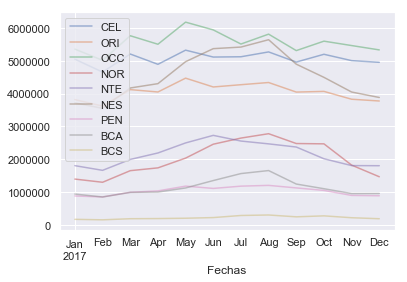

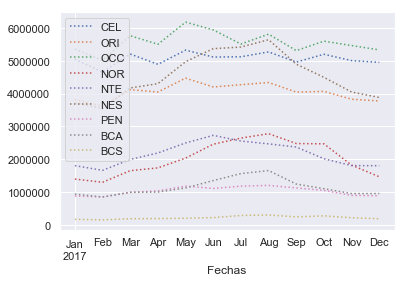

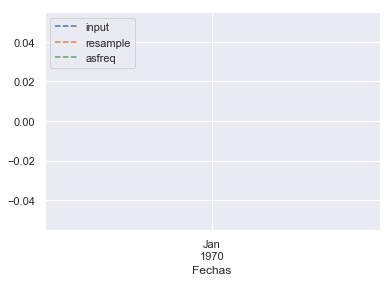

In [36]:
energia8.plot(alpha=0.5, style='-')
energia8.resample('M').mean().plot(style=':')
energia8.asfreq('M').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],loc='upper left');

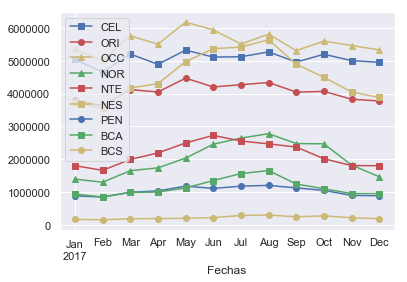

In [39]:
styles=['bs-','ro-','y^-','g^-','rs-','ys-','bo-','gs-','yo-']
lws = [2]
energia8.plot(style=styles)
